In [1]:
# put absolute path here
DATA_DIR = r"C:\Users\Joanna\NLP_homeworks\json"

In [2]:
# making usage of my helper .py file in jupyter environment on any computer
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from file_utils import *
data_manager = DataManager(DATA_DIR)

In [3]:
# Actual homework starts here
import re
generator = data_manager.judgments_generator(year=2009)

In [4]:
def make_value_from_match(number_group, magnitude_fraction_group):
    # remove separators
    number_group = re.sub(re.compile(r'\s+'), '', number_group).replace('.', '')
    magnitude_fraction_group = magnitude_fraction_group.replace('.', '')
    magnitudes = {'tys': 1000, 'mln':10e6, 'mld':10e9, '': 1}
    if magnitude_fraction_group in magnitudes:  
        return int(number_group) * magnitudes[magnitude_fraction_group]
    else:
        return int(number_group) + float('0.' + magnitude_fraction_group[1:])

In [5]:
#MONEY REGEX
value = r'(?:\d+(?P<sep>\.|(?:\s)))?(?:\d+(?P=sep))*\d+'

magnitude = r'(?:mld|mln|tys)?(?:\.)?'
fractions = r',\d\d'
currency = r'(?:starych)?\s*(?:złotych|zł)'

money_regex = r'((%s)\s*(%s|%s)\s*(%s))' % (value, magnitude, fractions, currency)

In [6]:
# singular_forms = "szkoda", "szkodzie", "szkodę", "szkodą", "szkodo"
# plural_forms = "szkody", "szkód", "szkodom", "szkodami", "szkodach"

damage_regex = r'\b((szkod(?:a|zie|ę|ą|o|y|om|ami|ach))|szkód)(?!\d|\w|ą|ę|ś|ć|ń|ź|ż|ó|ł)'

In [7]:
regulation_regex = r'Ust(\.|awa)\s+z\s+dn(ia|\.)\s+23\s+kwietnia\s+1964\s*r\.?.*art\.?\s*445'

In [8]:
plot_data_to_mln = []
plot_data_from_mln = []

amounts_counter = 0
damage_counter = 0
regulations_counter = 0
all_counter = 0
while True:
    try:
        content = generator.__next__()
        all_counter += 1
        if re.search(damage_regex, content["textContent"]) is not None:
            damage_counter += 1
            print(content["id"])
            print(re.search(damage_regex, content["textContent"]))
        words = re.findall(money_regex, content["textContent"])
        for word in words:
#             print(content["id"])
#             print(word)
            value = make_value_from_match(word[1], word[3])
#             print(value)
            plot_data_to_mln.append(value) if value <= 1000000 else plot_data_from_mln.append(value)
        amounts_counter += len(words)
        
        for regulation in content["referencedRegulations"]:
            if re.search(regulation_regex, regulation["text"]):
#                 print(regulation["text"])
#                 print(content["id"])
                regulations_counter += 1
                break
    except StopIteration:
        break
print("Total number of gathered amounts: %d" % amounts_counter)   
print("Total number of judgments with damage word is: %d" % damage_counter)  
print("Total number of judgments with regulation given is: %d" % regulations_counter)
print("Total: %d" % all_counter)

89404
<_sre.SRE_Match object; span=(259, 265), match='szkody'>
89407
<_sre.SRE_Match object; span=(9381, 9387), match='szkodą'>
89408
<_sre.SRE_Match object; span=(15874, 15880), match='szkody'>
89420
<_sre.SRE_Match object; span=(7238, 7244), match='szkodę'>
89414
<_sre.SRE_Match object; span=(17599, 17605), match='szkody'>
89415
<_sre.SRE_Match object; span=(13800, 13806), match='szkody'>
89417
<_sre.SRE_Match object; span=(10345, 10351), match='szkody'>
89426
<_sre.SRE_Match object; span=(656, 662), match='szkodę'>
89428
<_sre.SRE_Match object; span=(16823, 16829), match='szkodą'>
89393
<_sre.SRE_Match object; span=(1256, 1262), match='szkodę'>
89396
<_sre.SRE_Match object; span=(3124, 3130), match='szkodę'>
89397
<_sre.SRE_Match object; span=(1597, 1603), match='szkody'>
89399
<_sre.SRE_Match object; span=(5347, 5353), match='szkody'>
89459
<_sre.SRE_Match object; span=(916, 922), match='szkodę'>
89461
<_sre.SRE_Match object; span=(8610, 8616), match='szkodę'>
89463
<_sre.SRE_Match

89777
<_sre.SRE_Match object; span=(5899, 5905), match='szkodę'>
89781
<_sre.SRE_Match object; span=(1359, 1365), match='szkodę'>
89782
<_sre.SRE_Match object; span=(10770, 10776), match='szkody'>
89783
<_sre.SRE_Match object; span=(1550, 1556), match='szkody'>
89784
<_sre.SRE_Match object; span=(11630, 11636), match='szkodę'>
89785
<_sre.SRE_Match object; span=(3470, 3476), match='szkodę'>
89790
<_sre.SRE_Match object; span=(2466, 2472), match='szkodę'>
89791
<_sre.SRE_Match object; span=(6676, 6682), match='szkody'>
113808
<_sre.SRE_Match object; span=(5242, 5248), match='szkodą'>
113813
<_sre.SRE_Match object; span=(34207, 34212), match='szkód'>
89852
<_sre.SRE_Match object; span=(1050, 1056), match='szkody'>
109378
<_sre.SRE_Match object; span=(3548, 3554), match='szkodę'>
89831
<_sre.SRE_Match object; span=(765, 771), match='szkodę'>
89847
<_sre.SRE_Match object; span=(17717, 17723), match='szkody'>
89848
<_sre.SRE_Match object; span=(6971, 6977), match='szkodę'>
89854
<_sre.SRE_M

90202
<_sre.SRE_Match object; span=(5497, 5503), match='szkoda'>
90204
<_sre.SRE_Match object; span=(2771, 2777), match='szkodę'>
90210
<_sre.SRE_Match object; span=(3150, 3156), match='szkodę'>
90227
<_sre.SRE_Match object; span=(273, 279), match='szkody'>
90223
<_sre.SRE_Match object; span=(2161, 2167), match='szkodą'>
90224
<_sre.SRE_Match object; span=(3407, 3413), match='szkody'>
90225
<_sre.SRE_Match object; span=(1533, 1541), match='szkodami'>
90289
<_sre.SRE_Match object; span=(14137, 14143), match='szkody'>
109160
<_sre.SRE_Match object; span=(2876, 2882), match='szkody'>
90269
<_sre.SRE_Match object; span=(2230, 2236), match='szkodę'>
90270
<_sre.SRE_Match object; span=(3157, 3163), match='szkody'>
90278
<_sre.SRE_Match object; span=(602, 608), match='szkody'>
108987
<_sre.SRE_Match object; span=(5623, 5628), match='szkód'>
90251
<_sre.SRE_Match object; span=(10542, 10548), match='szkody'>
90255
<_sre.SRE_Match object; span=(1231, 1237), match='szkody'>
109006
<_sre.SRE_Match

90532
<_sre.SRE_Match object; span=(6424, 6430), match='szkody'>
90533
<_sre.SRE_Match object; span=(1127, 1133), match='szkody'>
90538
<_sre.SRE_Match object; span=(5260, 5266), match='szkody'>
90542
<_sre.SRE_Match object; span=(1106, 1112), match='szkody'>
90555
<_sre.SRE_Match object; span=(23393, 23401), match='szkodzie'>
90557
<_sre.SRE_Match object; span=(10388, 10394), match='szkodę'>
90559
<_sre.SRE_Match object; span=(11654, 11660), match='szkodę'>
90560
<_sre.SRE_Match object; span=(2543, 2549), match='szkody'>
90561
<_sre.SRE_Match object; span=(23609, 23615), match='szkody'>
90569
<_sre.SRE_Match object; span=(15781, 15787), match='szkody'>
90570
<_sre.SRE_Match object; span=(3317, 3323), match='szkodę'>
90571
<_sre.SRE_Match object; span=(533, 539), match='szkody'>
108980
<_sre.SRE_Match object; span=(40693, 40699), match='szkodę'>
136895
<_sre.SRE_Match object; span=(8642, 8648), match='szkoda'>
90549
<_sre.SRE_Match object; span=(6575, 6581), match='szkody'>
90550
<_sre

114658
<_sre.SRE_Match object; span=(25566, 25571), match='szkód'>
267992
<_sre.SRE_Match object; span=(7034, 7040), match='szkody'>
109037
<_sre.SRE_Match object; span=(53391, 53396), match='szkód'>
109408
<_sre.SRE_Match object; span=(2815, 2821), match='szkody'>
114571
<_sre.SRE_Match object; span=(7203, 7208), match='szkód'>
90897
<_sre.SRE_Match object; span=(1990, 1996), match='szkodę'>
90903
<_sre.SRE_Match object; span=(26079, 26085), match='szkoda'>
90911
<_sre.SRE_Match object; span=(1719, 1725), match='szkody'>
90912
<_sre.SRE_Match object; span=(6093, 6099), match='szkody'>
90919
<_sre.SRE_Match object; span=(3392, 3398), match='szkoda'>
90920
<_sre.SRE_Match object; span=(2872, 2878), match='szkody'>
90921
<_sre.SRE_Match object; span=(2909, 2915), match='szkody'>
90923
<_sre.SRE_Match object; span=(75, 81), match='szkody'>
90925
<_sre.SRE_Match object; span=(4651, 4657), match='szkody'>
90953
<_sre.SRE_Match object; span=(1635, 1641), match='szkodę'>
90954
<_sre.SRE_Match

91228
<_sre.SRE_Match object; span=(708, 714), match='szkody'>
109522
<_sre.SRE_Match object; span=(2744, 2750), match='szkody'>
47327
<_sre.SRE_Match object; span=(15754, 15760), match='szkoda'>
91339
<_sre.SRE_Match object; span=(952, 958), match='szkody'>
91348
<_sre.SRE_Match object; span=(1935, 1941), match='szkody'>
91349
<_sre.SRE_Match object; span=(4800, 4806), match='szkody'>
91350
<_sre.SRE_Match object; span=(4162, 4168), match='szkody'>
91352
<_sre.SRE_Match object; span=(16324, 16330), match='szkody'>
91353
<_sre.SRE_Match object; span=(6851, 6857), match='szkody'>
91354
<_sre.SRE_Match object; span=(319, 325), match='szkody'>
114809
<_sre.SRE_Match object; span=(15402, 15408), match='szkody'>
165134
<_sre.SRE_Match object; span=(7088, 7094), match='szkody'>
91307
<_sre.SRE_Match object; span=(1223, 1229), match='szkody'>
91310
<_sre.SRE_Match object; span=(1737, 1743), match='szkoda'>
91311
<_sre.SRE_Match object; span=(5729, 5735), match='szkodę'>
91313
<_sre.SRE_Match 

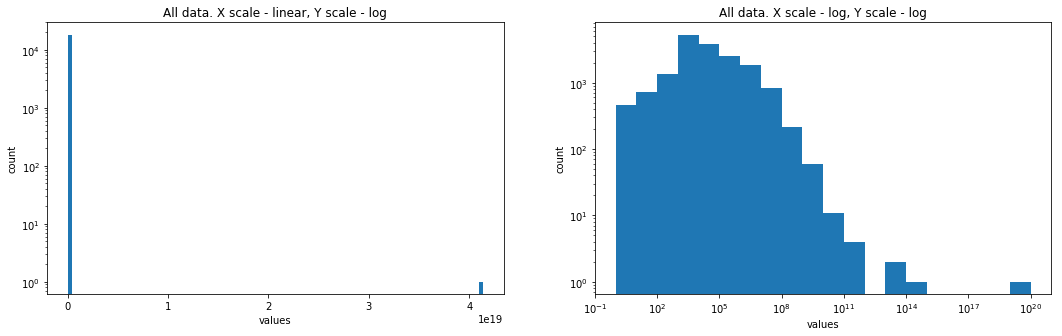

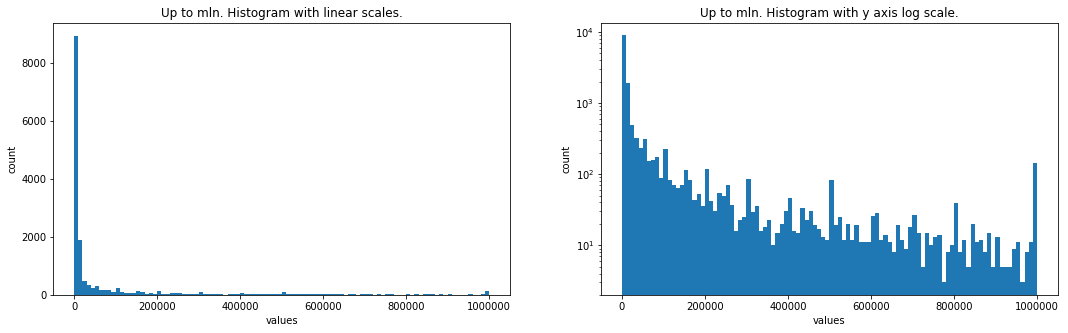

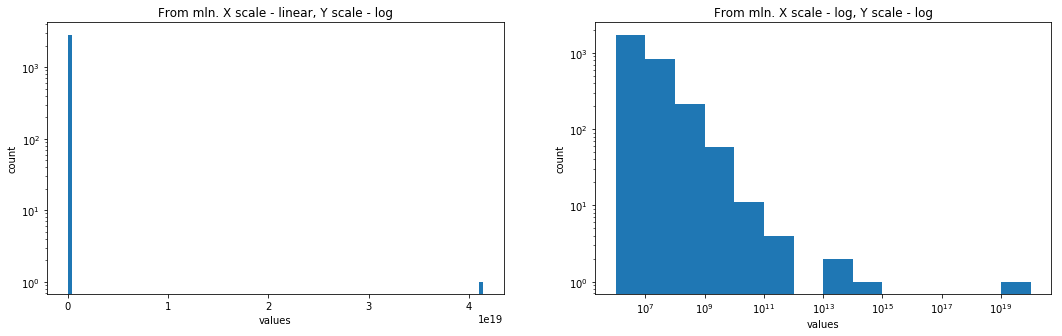

In [9]:
# Uwaga: w orzeczeniu https://www.saos.org.pl/api/judgments/114212
# znajduje sie kwota 4 136 000 000 mld zł, która mocno zaburza wykresy

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.hist(plot_data_to_mln + plot_data_from_mln, bins=100, log=True)
plt.xlabel('values')
plt.ylabel('count')
plt.title('All data. X scale - linear, Y scale - log')

plt.subplot(122)
plt.hist(plot_data_to_mln + plot_data_from_mln, bins=[ 10**x for x in range(0, 21) ], log=True)
plt.xlabel('values')
plt.ylabel('count')
plt.xscale('log')
plt.title('All data. X scale - log, Y scale - log')


plt.figure(figsize=(18,5))
plt.subplot(121)
plt.hist(plot_data_to_mln, bins=100)
plt.xlabel('values')
plt.ylabel('count')
plt.title('Up to mln. Histogram with linear scales.')

plt.subplot(122)
plt.hist(plot_data_to_mln, bins=100, log=True)
plt.xlabel('values')
plt.ylabel('count')
plt.title('Up to mln. Histogram with y axis log scale.')


plt.figure(figsize=(18,5))
plt.subplot(121)
plt.hist(plot_data_from_mln, bins=100, log=True)
plt.xlabel('values')
plt.ylabel('count')
plt.title('From mln. X scale - linear, Y scale - log')

plt.subplot(122)
plt.hist(plot_data_from_mln, bins=[ 10**x for x in range(6, 21)], log=True)
plt.xlabel('values')
plt.ylabel('count')
plt.xscale('log')
plt.title('From mln. X scale - log, Y scale - log')
print("") # prevent printing bins content  